
#   <div style="text-align: center;">TP3: (with solutions + notes) Algorithme de Box-Muller et Simulation de Vecteurs Gaussiens
  </div>     

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Objectif

On se propose de simuler des variables aléatoires à l'aide de la méthodes de Box-Muller ainsi que des vecteurs gaussiens indépendants et non-indépendants.

##  Partie I: Algorithmes de Box-Muller

La méthode de Box-Muller est une technique populaire pour générer des échantillons aléatoires à partir d'une distribution normale centrée réduite. La méthode repose sur la transformation de deux variables aléatoires uniformes indépendantes en deux variables aléatoires normales indépendantes.

Plus précisément, la méthode de Box-Muller consiste en les étapes suivantes :
* Générer deux variables aléatoires uniformes indépendantes $U_1$ et $U_2$, chacune étant dans l'intervalle [0,1].
* Calculer $Z_1$ et $Z_2$ comme suit :

$$
 Z_1 =      \sqrt{-2 \ln(U_1)} \cos(2 \pi U_2) $$

$$   Z_2 =   \sqrt{-2 \ln(U_1)} \sin(2 \pi U_2) $$

Les variables $Z_1$ et $Z_2$ sont i.i.d. et suivent la loi normale centrée réduite.




### Exercice

* Écrire une fonction qui retourne $n$ réalisations de la loi normale $\mathcal{N}(0,1)$ par la méthode de Box-Muller.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
def generate_BM(n):
    n_half = n // 2  # To get n/2 for even n
    u1 = np.random.rand(n_half)
    u2 = np.random.rand(n_half)
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    # If n is odd, generate one extra value
    if n % 2 != 0:
        extra = np.sqrt(-2 * np.log(np.random.rand())) * np.cos(2 * np.pi * np.random.rand())
        z = np.concatenate((z1, [extra], z2))
    else:
        z = np.concatenate((z1, z2))
    return z



In [ ]:
5//2

2

In [ ]:
10 % 2 != 0

False

In [ ]:
# Generate random variables using Box-Muller algorithm
Z = generate_BM(1001)
len(Z)

1001

* Valider l’algorithme à l’aide d’un outil graphique (Q-Q plot et Fonction de répartition empirique).


((array([-3.19787765, -2.93268809, -2.78470242, ...,  2.78470242,
          2.93268809,  3.19787765]),
  array([-3.17486547, -3.14256512, -2.65009908, ...,  3.05465125,
          3.09668845,  3.20378992])),
 (0.9836077142417965, -0.0389104959190812, 0.9995513690639469))

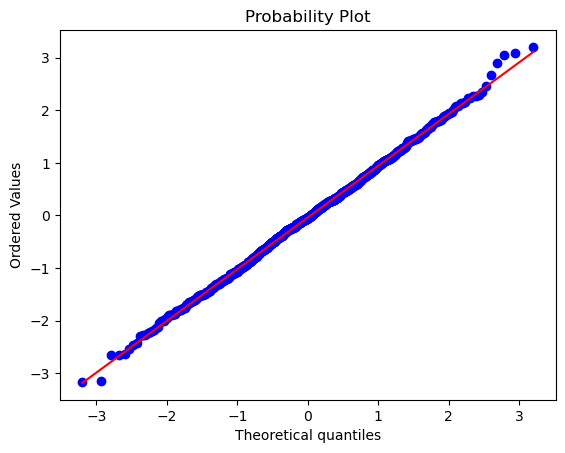

In [ ]:
#### le QQ plot
stats.probplot(Z, dist="norm", plot=plt)


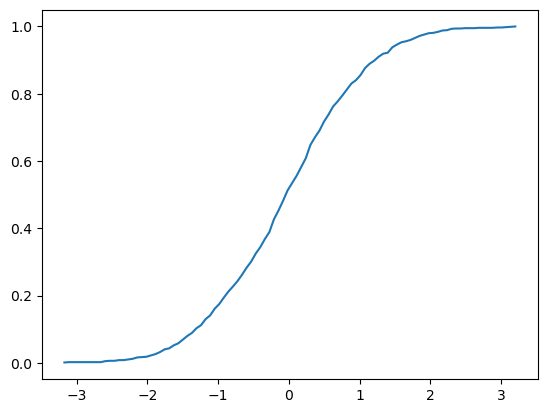

In [ ]:
### le ECDF
t = np.linspace(np.min(Z), np.max(Z), 100)
F_hat = lambda t: np.mean(Z <= t)
F = np.array([F_hat(i) for i in t])
plt.plot(t,F)




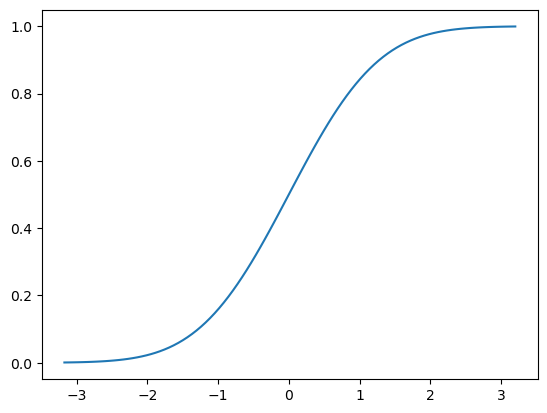

In [ ]:
### cdf de la loi normale (pour comparer)
F_normal=stats.norm.cdf(t)
plt.plot(t,F_normal)

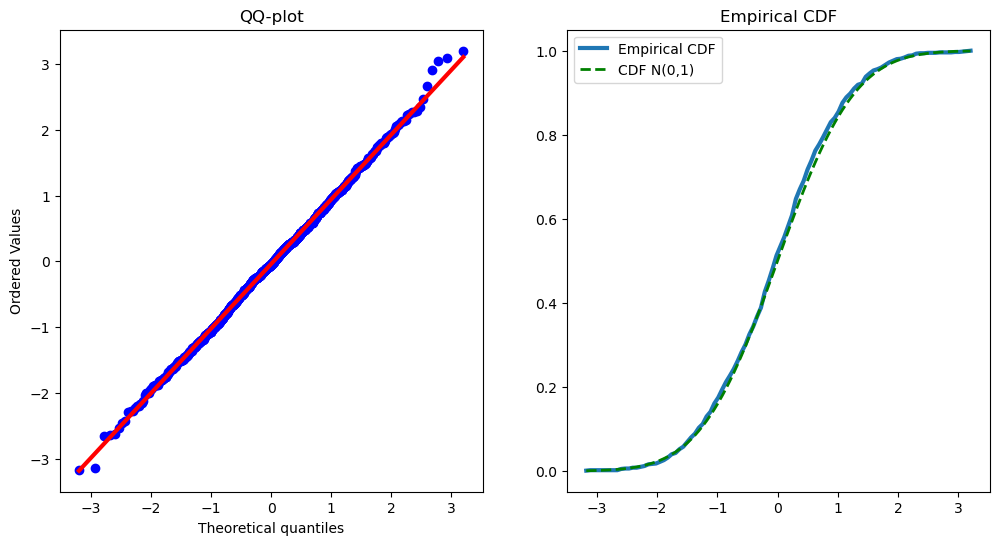

In [ ]:
fig, (qq, ecdf) = plt.subplots(1, 2, figsize=(12, 6))

# QQ-plot
stats.probplot(Z, dist="norm", plot=qq)
qq.set_title('QQ-plot')
qq.get_lines()[1].set_color('red')
qq.get_lines()[1].set_linewidth(3)
# Si les données suivent parfaitement la distribution de référence,
# les points du QQ-plot formeront une ligne droite de 45 degrés,
# ce qui signifie que les quantiles empiriques correspondent exactement aux quantiles théoriques.


# Empirical cumulative distribution function (CDF)
t = np.linspace(np.min(Z), np.max(Z), 100)
F_hat = lambda t: np.mean(Z <= t)
F = np.array([F_hat(i) for i in t])
ecdf.plot(t, F, lw=3, label='Empirical CDF')
ecdf.plot(t, stats.norm.cdf(t), color='green', lw=2, ls='--', label='CDF N(0,1)')
ecdf.set_title('Empirical CDF')
ecdf.legend()

# plt.tight_layout() # Cette ligne ajuste automatiquement les paramètres du tracé pour éviter les chevauchements.
# plt.show()



##  Partie II: Simulation de Vecteurs Gaussiens

# Objectif

On se propose de simuler des vecteurs gaussiens indépendants et non-indépendants.


# Rappel

Un générateur de la loi $\mathcal{N}(0,1)$ permet de simuler un vecteur aléatoire $X = (X_1, ... ,X_d )$ de $\mathbb{R}^d$ de loi normale multivariée $\mathcal{N}(\mu, \sigma^2)$.
\\

**$1^{er}$ cas: Matrice de covariance $\Sigma$ diagonale.**

 Il suffit de générer $d$ variables $X_i$ pour $ i=1,..., d$, indépendantes de lois normale respectives $\mathcal{N}(\mu_i, \Sigma_{ii})$. Pour ce faire, il suffit de simuler $Z_1, ...,Z_d$ des variables aléatoires i.i.d. suivant la loi $\mathcal{N}(0,1)$ et d’utiliser la transformation $X_i= \mu_i+ Z_i \sqrt{\Sigma_{ii}}$. \\

**$2^{eme}$ cas: Matrice de covariance $\Sigma$ non diagonale.**

 La méthode précédente n’est pas envisageable. On utilise alors la décomposition de Cholesky de $\Sigma$. \\

# Exemple:

En dimension 2, soit $Z \equiv (Z_1, Z_2) \sim \mathcal{N}(0_2, I_2)$, $\rho \in [-1, 1]$ une constante. En posant,
\begin{align*}
    X_1 &\equiv \mu_1 + \sigma_1 Z_1 \\
    X_2 &\equiv \mu_2 + \sigma_2 \left(\rho Z_1 + \sqrt{1 - \left(\rho\right)^2} Z_2\right),
\end{align*}
on a
$$
X \equiv (X_1, X_2) \sim \mathcal{N}\left(
\begin{bmatrix}
    \mu_1 \\
    \mu_2
\end{bmatrix},
\begin{bmatrix}
    \sigma_1^2 & \rho\sigma_1\sigma_2 \\
    \rho\sigma_1\sigma_2 & \sigma_2^2
\end{bmatrix}
\right).
$$


### Exercice

Soit $X = (X_1,X_2)$ de loi normale multivariée, et soient:


$\mu = \begin{pmatrix}
1 \\
2
\end{pmatrix}, \qquad$
$\Sigma_1 =
\begin{pmatrix}
    4&0\\
    0&9
\end{pmatrix} \qquad
$
et
$ \qquad
\Sigma_2 =
\begin{pmatrix}
    4&3\\
    3&9
\end{pmatrix}
$



#### Question 1:
On donne $\rho = 0.5$, écrire une fonction qui permet de simuler une suite de vecteurs $\left( X^{(n)}\right)_{n\geq 1} = \left( X_{1,n}, X_{2,n} \right)_{n\geq 1} $ qui suivent la loi $\mathcal{N}(\mu, \Sigma_1)$.
L'agorithme de Box-Muller peut être utilisé pour la génération de $Z$. (voir exemple)


In [ ]:
import numpy as np

In [ ]:
def generate_BM(n):
    n_half = n // 2
    u1 = np.random.rand(n_half)
    u2 = np.random.rand(n_half)
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    if n % 2 != 0:
        extra = np.sqrt(-2 * np.log(np.random.rand())) * np.cos(2 * np.pi * np.random.rand())
        z = np.concatenate((z1, [extra], z2))
    else:
        z = np.concatenate((z1, z2))
    return z

In [ ]:

def gaussienne(n, mu, sigma, rho):
    z_1 = generate_BM(n)
    z_2 = generate_BM(n)
    x_1 = mu[0] + sigma[0] * z_1
    x_2 = mu[1] + sigma[1] * (rho * z_1 + np.sqrt
                              (1 - rho**2) * z_2)
    return np.vstack((x_1, x_2))

In [ ]:

# Question 1
n = 100
#donné dans l'exercice
mu = np.array([1, 2])
s = np.array([2, 3])
rho = 0.5
x = gaussienne(n, mu, s, rho)
print(x)

[[ 4.97037428e-01  2.18272860e+00  1.14124444e+00 -3.06806539e+00
   4.37516534e+00  1.94017627e+00  1.82930032e+00  2.87834988e+00
  -1.24985048e+00  6.35544843e-01  1.09684476e+00 -1.06917692e+00
   4.48609079e+00 -7.96289054e-01  1.30701099e+00  5.82755534e-01
   1.95725926e-01 -4.47920874e-01  1.62170015e+00  1.30205973e+00
   1.84629373e+00  2.21706882e+00  2.48783062e+00  2.84137780e+00
  -3.76413401e+00  2.27460597e+00 -6.53011474e-01  4.18649635e+00
   2.83962276e+00 -1.71670352e+00  2.77684898e+00  2.67868062e+00
   1.01967297e+00  1.67489115e+00  1.00421709e+00  4.86034565e+00
   2.63744381e+00  2.82183343e+00  3.57035135e-01 -1.50181915e+00
   2.66222130e+00  8.04028821e-01 -2.46682893e+00  8.09957822e-01
   1.84258684e+00 -1.05809681e+00  1.52904198e+00 -6.39931834e-01
  -8.27609448e-02  3.41248072e+00 -6.29801023e-01  8.44547543e-01
   8.13507529e-01 -9.11389288e-01 -1.97843471e+00  3.94106638e+00
   2.96031059e+00  3.61310170e+00  1.86063236e+00  2.25866609e+00
   1.35446

Text(0, 0.5, 'x2')

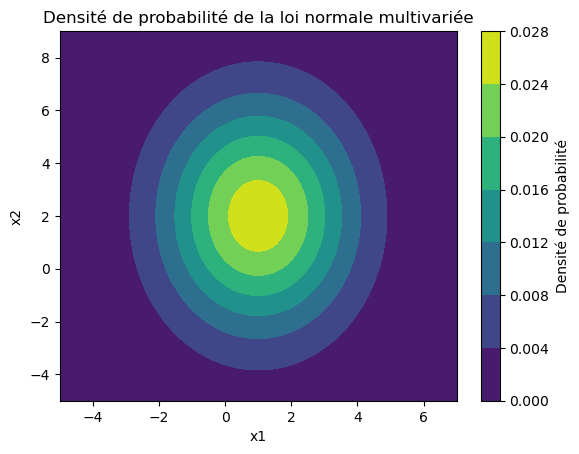

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

cov_matrix = np.array([[4, 0], [0, 9]])  # Matrice de covariance

x1, x2 = np.meshgrid(np.linspace(-5, 7, 100), np.linspace(-5, 9, 100))
grid = np.dstack((x1, x2))

# Calcul de la densité de probabilité pour chaque point de la grille
pdf_values = multivariate_normal.pdf(grid, mean=mu, cov=cov_matrix)

# Création d'un graphique de contour pour représenter la densité de probabilité
plt.contourf(x1, x2, pdf_values, cmap='viridis')
plt.colorbar(label='Densité de probabilité')

plt.title('Densité de probabilité de la loi normale multivariée')
plt.xlabel('x1')
plt.ylabel('x2')

### Question 2:
 Simuler une suite de vecteurs $\left( X^{(n)}\right)_{n\geq 1} = \left( X_{1,n}, X_{2,n} \right)_{n\geq 1} $ qui suivent la loi $\mathcal{N}(\mu, \Sigma_2)$ .

In [ ]:
# Vérifier si la matrice est symétrique définie positive
A=np.array([[4, 3], [3, 9]])

# 1- La matrice de covariance est elle symétrique ?
is_symmetric = np.allclose(A, A.T)
print(is_symmetric)

# 2- La matrice de covariance est elle définie positive ?
eigenvalues = np.linalg.eigvals(A)
is_definitely_positive = all(eig > 0 for eig in eigenvalues)
print(is_definitely_positive)

True
True


In [ ]:
from numpy.linalg import cholesky

def chol_decomp(n, mu, sigma):
    z = np.random.normal(size=(n, len(mu)))
    L = cholesky(sigma)
    mu = mu.reshape(-1, 1) #Broadcasting
    # Reshape mu to a column vector


    x = mu +  L.dot(z.T)
    return x.T

In [ ]:
sigma = np.array([[4, 3], [3, 9]])
mu = np.array([1, 2])
x = chol_decomp(100, mu, sigma)
# print(x)
x.shape

(100, 2)

In [ ]:
# des tests

z = np.random.normal(size=(100, len([1,2])))
L = cholesky(np.array([[4, 3], [3, 9]]))
z.shape #(100,2)
L.shape #(2,2)
# L.dot(z.T)

(2, 2)

### Question 3:
On suppose que $X = (X_1,X_2)$ de loi $\mathcal{N}(\mu, \Sigma_2)$.

    1- Quelle est la loi de $X_1 +X_2$ ?
    
    2- Comparer la densité de $X_1 +X_2$ avec l’histogramme de simulation.

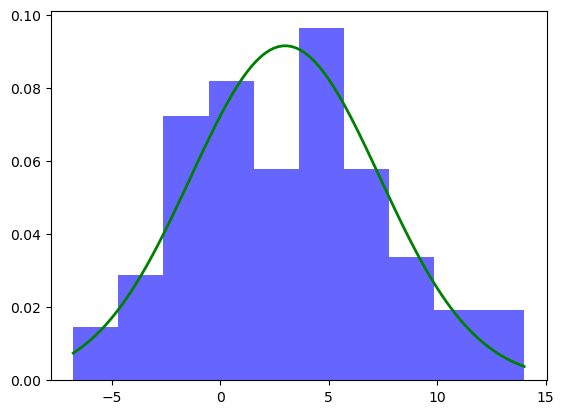

In [ ]:
from scipy.stats import norm

x_sum = np.sum(x, axis=1)
plt.hist(x_sum, density=True, alpha=0.6, color='blue')


sd = np.sqrt(s[0]**2 + s[1]**2 + 2 * s[0] * s[1] * rho)

x_values = np.linspace(min(x_sum), max(x_sum), 100)
plt.plot(x_values, norm.pdf(x_values, np.sum(mu), sd), 'g', linewidth=2)
plt.show()


In [ ]:
sd = np.sqrt(s[0]**2 + s[1]**2 + 2 * s[0] * s[1] * rho)
print(sd)

4.358898943540674


In [ ]:
np.sqrt(19)

4.358898943540674